In [1]:
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


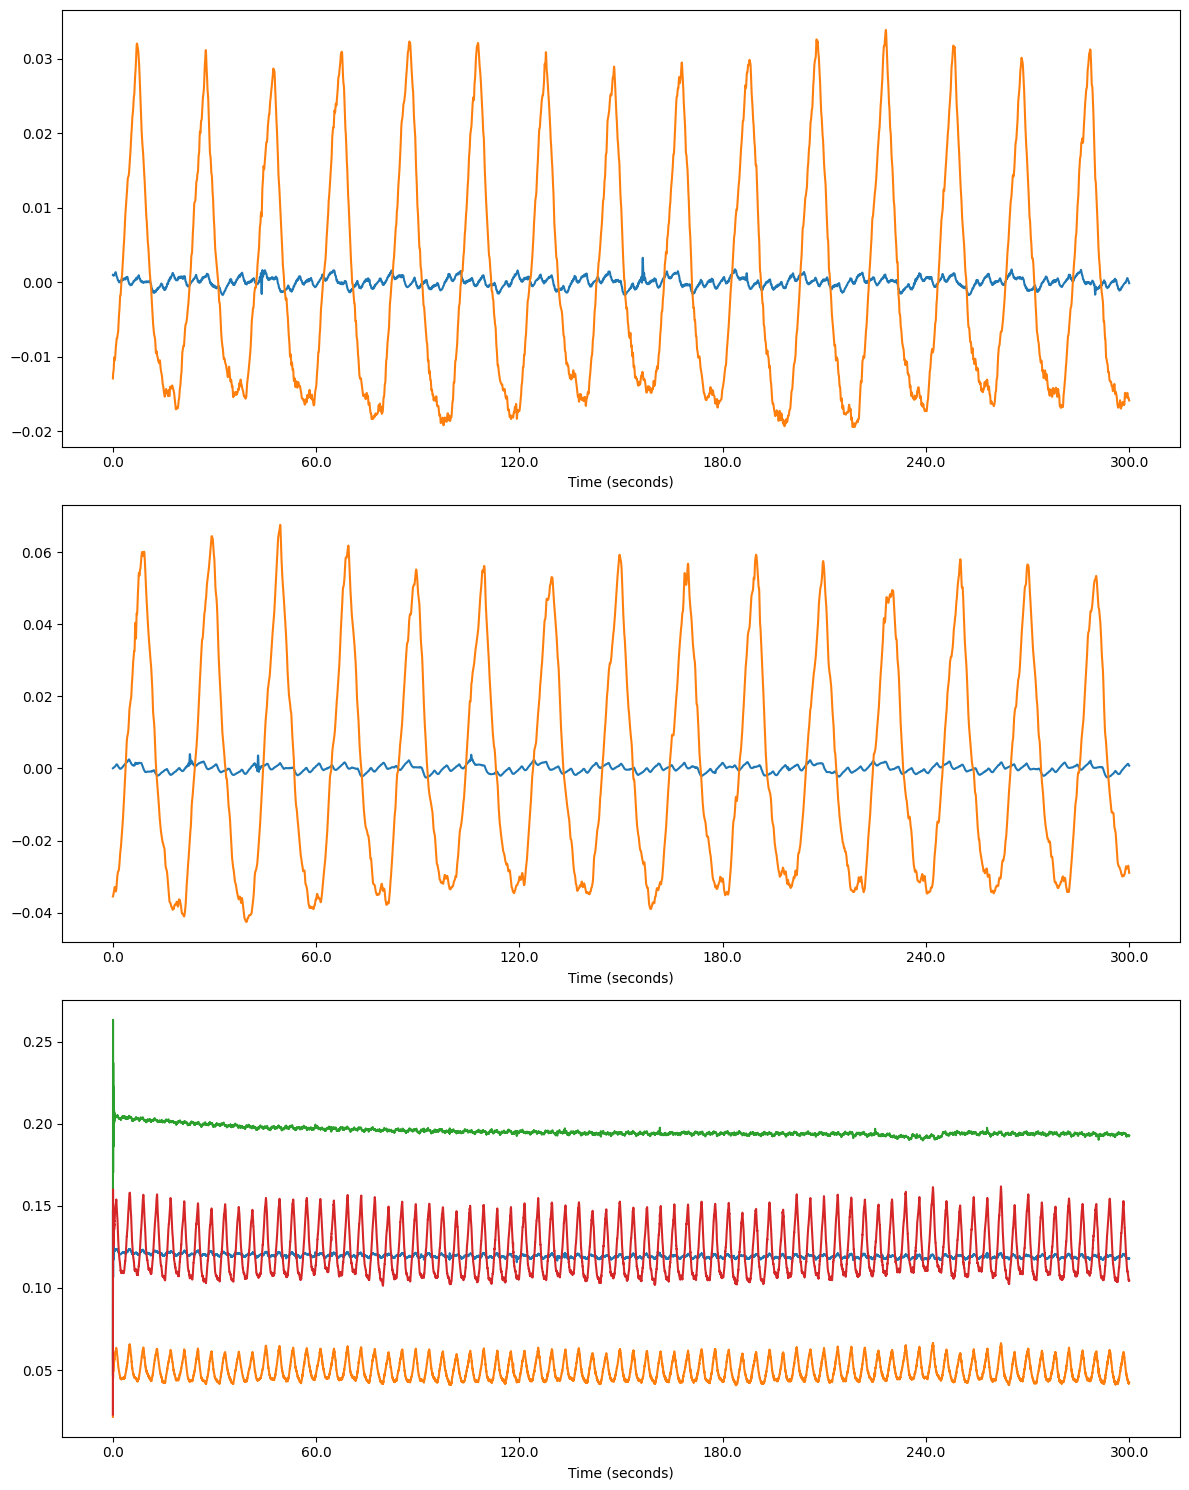

In [2]:
df1 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\07252022_sheep\\CW_extract_07-25-22.csv')
df2 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\07252022_sheep\\extract_07-25-22_R2.csv')
df3 = pd.read_csv('D:\\Codes\\CW_sheep\\CW_sheep\\07252022_sheep\\extract_07-25-22_R1.csv')


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

def set_axis_labels(ax, length):
    time_ticks = np.linspace(0, 300, 6)  # [0, 60, 120, ...]
    normalized_ticks = np.linspace(0, 1, 6)  # [0, 0.2, 0.4, ...]
    ax.set_xticks(normalized_ticks)
    ax.set_xticklabels(time_ticks)
    ax.set_xlabel('Time (seconds)')


time_normalized = np.linspace(0, 1, len(df1))
for column in df1.columns:
    axes[0].plot(time_normalized, df1[column], label=column)
set_axis_labels(axes[0], len(df1))

time_normalized = np.linspace(0, 1, len(df2))
for column in df2.columns:
    axes[1].plot(time_normalized, df2[column], label=column)
set_axis_labels(axes[1], len(df2))

time_normalized = np.linspace(0, 1, len(df3))
for column in df3.columns:
    axes[2].plot(time_normalized, df3[column], label=column)
set_axis_labels(axes[2], len(df3))


plt.tight_layout()
plt.show()


In [3]:

df2 = pd.read_csv('D:\Codes\CW_sheep\CW_sheep\\07252022_sheep\extract_07-25-22_R1.csv')

# 定义采样频率和周期
f = 1.5  # 假设频率为1.5Hz
T = 1 / f  # 计算周期
fs = 80  # 根据您的数据实际情况来设置采样频率
samples_per_period = int(T * fs)  # 每个周期的样本数

# 初始化一个字典来存储每列所有周期平均值的列表
all_periods_avgs = {column: [] for column in df2.columns}

# 遍历每一列，计算每个周期的平均值
for column in df2.columns:
    # 计算周期平均值
    for i in range(0, len(df2[column]), samples_per_period):
        period_data = df2[column].iloc[i:i + samples_per_period]
        if len(period_data) == samples_per_period:  # 确保周期完整
            period_avg = period_data.mean()
            all_periods_avgs[column].append(period_avg)

# 计算并打印每列所有周期平均值的整体平均值
for column in all_periods_avgs:
    overall_avg = np.mean(all_periods_avgs[column])
    print(f"{column} - Overall Average Across Periods: {overall_avg}")



ch1voltsWL1 - Overall Average Across Periods: 0.11948468980631156
ch5voltsWL1 - Overall Average Across Periods: 0.05011257639004842
ch1voltsWL2 - Overall Average Across Periods: 0.1954999364251127
ch5voltsWL2 - Overall Average Across Periods: 0.12303072107196526


In [4]:
# 735nm L 
path4 = 'D:\Codes\CW_sheep\CW_sheep\\4layer_pathlength_735nm_1cmSD_120Mphotons.mat'

data4 = scipy.io.loadmat(path4)

key4 = list(data4.keys())[-1]  
df4 = pd.DataFrame(data4[key4])

df4 = df4.rename(columns={
    0: 'L1',
    1: 'L2',
    2: 'L3',
    3: 'L4'
})
print(df4)



#850nm L
path5 = 'D:\Codes\CW_sheep\CW_sheep\\4layer_pathlength_850nm_1cmSD_120Mphotons.mat'

data5 = scipy.io.loadmat(path5)

key5 = list(data5.keys())[-1]  
df5 = pd.DataFrame(data5[key5])

df5 = df5.rename(columns={
    0: 'L1',
    1: 'L2',
    2: 'L3',
    3: 'L4'
})
print(df5)


               L1          L2   L3   L4
0       54.753288    0.000000  0.0  0.0
1       78.021431    0.000000  0.0  0.0
2       90.904373    0.000000  0.0  0.0
3       64.026131    0.000000  0.0  0.0
4      100.246094    0.000000  0.0  0.0
...           ...         ...  ...  ...
76983  791.668518  105.075806  0.0  0.0
76984  206.021210    0.000000  0.0  0.0
76985  846.656433  310.908875  0.0  0.0
76986  158.841934    0.000000  0.0  0.0
76987  243.857040    0.000000  0.0  0.0

[76988 rows x 4 columns]
               L1          L2         L3          L4
0       76.847389    0.000000   0.000000    0.000000
1       93.969093    0.000000   0.000000    0.000000
2       70.635590    0.000000   0.000000    0.000000
3       54.342648    0.000000   0.000000    0.000000
4      101.691292    0.000000   0.000000    0.000000
...           ...         ...        ...         ...
83859  107.901711    0.000000   0.000000    0.000000
83860  150.270004    0.000000   0.000000    0.000000
83861  555.481323

In [5]:
df2 = pd.read_csv('D:\Codes\CW_sheep\CW_sheep\\07252022_sheep\extract_07-25-22_R1.csv')
df2 = df2.apply(pd.to_numeric, errors='coerce')

# 定义采样频率和周期
f = 1.5  # 假设频率为1.5Hz
T = 1 / f  # 计算周期
fs = 80  # 采样频率

# 初始化deltas数组
deltas = np.linspace(0, 1, 100)

# 为WL1和WL2定义参数
params = {
    'WL1': {'ua1': 0.0085, 'constant': 77000, 'L1_values': df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)},
    'WL2': {'ua1': 0.0088, 'constant': 83900, 'L1_values': df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)}
}

# 创建一个空的DataFrame来存储反FFT结果
df_reconstructed = pd.DataFrame(index=df2.index)

# 遍历每一列进行FFT和反FFT处理
for column in df2.columns:
    # 获取列数据，并转换为 numpy 数组
    original_signal = df2[column].values
    signal = df2[column].values
    n = len(signal)

    # 应用 FFT
    yf = fft(signal)

    # 生成对应的频率值
    xf = np.linspace(0.0, fs/2, n//2)

    # 找到最接近1.5Hz的频率索引
    target_freq = 1.5
    index = np.where((xf >= target_freq - 0.5) & (xf <= target_freq + 0.5))[0]
    
    # 创建一个只含目标频率成分的信号
    yf_filtered = np.zeros_like(yf)
    yf_filtered[index] = yf[index]
    yf_filtered[-index] = yf[-index]  # 对称的负频率部分也要赋值

    # 应用逆FFT来重建信号
    reconstructed_signal = ifft(yf_filtered).real  # 取实部

    # 将重建的信号添加到新的DataFrame中
    df_reconstructed[column] = reconstructed_signal

    # 计算每个周期的最大值和最小值
    samples_per_period = int(T * fs)  # 每个周期的样本数
    num_periods = len(reconstructed_signal) // samples_per_period
    split_data = np.array_split(reconstructed_signal, num_periods)
    
    max_values = [np.max(period_data) for period_data in split_data if len(period_data) == samples_per_period]
    min_values = [np.min(period_data) for period_data in split_data if len(period_data) == samples_per_period]
    
    # 计算最大值和最小值的平均值
    avg_max = np.mean(max_values)
    avg_min = np.mean(min_values)
    
    # 计算所有周期平均值的整体平均值
    num_periods_original = len(original_signal) // samples_per_period
    split_data_original = np.array_split(original_signal, num_periods_original)
    overall_avg = np.mean([np.mean(period_data) for period_data in split_data_original if len(period_data) == samples_per_period])

    # 计算平均最大值和最小值之间的差值（avg_diff）
    avg_diff = avg_max - avg_min
    
    # 根据列选择参数
    if 'WL1' in column:
        ua1 = params['WL1']['ua1']
        constant = params['WL1']['constant']
        L1_values = params['WL1']['L1_values']
    else:
        ua1 = params['WL2']['ua1']
        constant = params['WL2']['constant']
        L1_values = params['WL2']['L1_values']

    # 计算方程左边的值
    left_side = -np.log10((overall_avg+avg_max)/ (overall_avg - avg_min))

    # 找到最接近的delta值
    right_sides = np.exp(np.sum(deltas[:, np.newaxis] * ua1 * L1_values, axis=1) / constant)
    index = np.argmin(np.abs(right_sides - left_side))
    best_delta = deltas[index]
    
    # 输出结果
    print(f"For column {column}:")
    print(f"Estimated Period: {samples_per_period} samples")
    print(f"Average Max per Period: {avg_max}")
    print(f"Average Min per Period: {avg_min}")
    print(f"Average Max-Min Difference per Period: {avg_diff}")
    print(f"Overall Average Across Periods: {overall_avg}")
    print(f"Best Delta corresponding to ratio: {best_delta}\n")

       


For column ch1voltsWL1:
Estimated Period: 53 samples
Average Max per Period: 0.0001533888620947833
Average Min per Period: -0.0001550564591581325
Average Max-Min Difference per Period: 0.00030844532125291584
Overall Average Across Periods: 0.11928496439141695
Best Delta corresponding to ratio: 0.0

For column ch5voltsWL1:
Estimated Period: 53 samples
Average Max per Period: 0.00030370199022930255
Average Min per Period: -0.0003155369611577999
Average Max-Min Difference per Period: 0.0006192389513871024
Overall Average Across Periods: 0.05002485701072882
Best Delta corresponding to ratio: 0.0

For column ch1voltsWL2:
Estimated Period: 53 samples
Average Max per Period: 0.00045033476455742604
Average Min per Period: -0.0004549595215654684
Average Max-Min Difference per Period: 0.0009052942861228944
Overall Average Across Periods: 0.19481030197928226
Best Delta corresponding to ratio: 0.0

For column ch5voltsWL2:
Estimated Period: 53 samples
Average Max per Period: 0.0010210654065589747
A

In [6]:

df2 = pd.read_csv('D:\Codes\CW_sheep\CW_sheep\\07252022_sheep\extract_07-25-22_R1.csv')
df2 = df2.apply(pd.to_numeric, errors='coerce')


# 定义采样频率和周期
f = 1.5  # 假设频率为1.5Hz
T = 1 / f  # 计算周期
fs = 80  # 采样频率

# 为WL1和WL2定义参数
params = {
    'WL1': {'ua1': 0.0085, 'constant': 77000, 'L1_values': df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)},
    'WL2': {'ua1': 0.0088, 'constant': 83900, 'L1_values': df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)}
}

# 初始化deltas数组
deltas = np.linspace(0, 1, 100)

# 创建一个空的DataFrame来存储反FFT结果
df_reconstructed = pd.DataFrame(index=df2.index)

# 初始化用于存储不同波长下特定通道的值的字典
channel_specific_values = {
    'Ch1': {'WL1': None, 'WL2': None}
}

for column in df2.columns:
    # 获取原始信号
    original_signal = df2[column].values
    n = len(original_signal)

    # 应用 FFT
    yf = fft(original_signal)

    # 生成对应的频率值
    xf = np.linspace(0.0, fs/2, n//2)

    # 找到最接近1.5Hz的频率索引
    target_freq = 1.5
    index = np.where((xf >= target_freq - 0.5) & (xf <= target_freq + 0.5))[0]
    
    # 创建一个只含目标频率成分的信号
    yf_filtered = np.zeros_like(yf)
    yf_filtered[index] = yf[index]
    yf_filtered[-index] = yf[-index]  # 对称的负频率部分也要赋值

    # 应用逆FFT来重建信号
    reconstructed_signal = ifft(yf_filtered).real  # 取实部

    # 将重建的信号添加到新的DataFrame中
    df_reconstructed[column] = reconstructed_signal

    # 计算重建信号的每个周期的最大值和最小值
    samples_per_period = int(T * fs)  # 每个周期的样本数
    num_periods_reconstructed = len(reconstructed_signal) // samples_per_period
    split_data_reconstructed = np.array_split(reconstructed_signal, num_periods_reconstructed)
    
    max_values = [np.max(period_data) for period_data in split_data_reconstructed if len(period_data) == samples_per_period]
    min_values = [np.min(period_data) for period_data in split_data_reconstructed if len(period_data) == samples_per_period]
    
    # 计算最大值和最小值的平均值
    avg_max = np.mean(max_values)
    avg_min = np.mean(min_values)

    # 划分原始信号为周期并计算每个周期的平均值
    num_periods_original = len(original_signal) // samples_per_period
    split_data_original = np.array_split(original_signal, num_periods_original)
    overall_avg = np.mean([np.mean(period_data) for period_data in split_data_original if len(period_data) == samples_per_period])

    # 计算方程左边的值
    left_side_value = -np.log10((overall_avg + avg_max) / (overall_avg - avg_min))
    print(f"For column {column}, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): {left_side_value}")

    # 存储特定通道的值
    if 'Ch1' in column:
        wl_key = 'WL1' if 'WL1' in column else 'WL2'
        channel_specific_values['CH1'][wl_key] = left_side_value

    # 根据列选择参数
    if 'WL1' in column:
        ua1 = params['WL1']['ua1']
        constant = params['WL1']['constant']
        L1_values = params['WL1']['L1_values']
    else:
        ua1 = params['WL2']['ua1']
        constant = params['WL2']['constant']
        L1_values = params['WL2']['L1_values']

    # 找到最接近的delta值
    right_sides = np.exp(np.sum(deltas[:, np.newaxis] * ua1 * L1_values, axis=1) / constant)
    index = np.argmin(np.abs(right_sides - left_side_value))
    best_delta = deltas[index]
    
    print(f"For column {column}:")
    print(f"Estimated Period: {samples_per_period} samples")
    print(f"Average Max per Period: {avg_max}")
    print(f"Average Min per Period: {avg_min}")
    print(f"Best Delta corresponding to ratio: {best_delta}\n")

# 打印CH1通道下不同WL的值的比值
wl1_value = channel_specific_values['Ch1']['WL1']
wl2_value = channel_specific_values['Ch1']['WL2']
if wl1_value is not None and wl2_value is not None:
    ratio = wl1_value / wl2_value
    print(f"Ratio of -log10 values for CH1 (WL1/WL2): {ratio}")
else:
    print("One or more values for CH1 are missing.")



For column ch1voltsWL1, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): 6.063572773185485e-06
For column ch1voltsWL1:
Estimated Period: 53 samples
Average Max per Period: 0.0001533888620947833
Average Min per Period: -0.0001550564591581325
Best Delta corresponding to ratio: 0.0

For column ch5voltsWL1, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): 0.00010211415614494073
For column ch5voltsWL1:
Estimated Period: 53 samples
Average Max per Period: 0.00030370199022930255
Average Min per Period: -0.0003155369611577999
Best Delta corresponding to ratio: 0.0

For column ch1voltsWL2, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): 1.0286162622541951e-05
For column ch1voltsWL2:
Estimated Period: 53 samples
Average Max per Period: 0.00045033476455742604
Average Min per Period: -0.0004549595215654684
Best Delta corresponding to ratio: 0.0

For column ch5voltsWL2, -log10((overall_avg + avg_max) / (overall_avg - avg_min)): 2.6766733071305405e-05
For column ch5vol

In [7]:
# 850nm 
# Ehb = 691  Ehbo2 = 1058 (cm-1 M-1) 

# 740nm
# Ehb = 446  Ehbo2 = 1116 (cm-1 M-1) 


# ua = Ehb * [Hb] + Ehbo2 * [Hbo2]

# Sheep1 spo2 = 100%
L1_values_lambda1 = df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)
L1_values_lambda2 = df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)
LB_lambda1 = sum(L1_values_lambda1)
LB_lambda2 = sum(L1_values_lambda2)
B1 = LB_lambda1/LB_lambda2 

# Spo2 Calculation
def spo2_cal(R):
    spo2 = (446 - R * 691 * (B1)) / (446 - 1116 + R * (1058-691) * (B1))
    return spo2

In [8]:
print('Sheep3 spo2 check')
#Ch1 
R1 = (1.0286/6.0636)
spo2_ch1 = spo2_cal(R1)
print('channel1 spo2 values',spo2_ch1)

#Ch5
R2 = (2.6767)/(6.0635)
spo2_ch2 = spo2_cal(R2)
print('channel5 spo2 values',spo2_ch2)



Sheep3 spo2 check
channel1 spo2 values -0.5538867777352402
channel5 spo2 values -0.32457719092962684


In [9]:
#CH1
# 给定的消光系数
e_hbo_850nm = 1058  # ϵ_HbO^λ1
e_hb_850nm = 691   # ϵ_Hb^λ1
e_hbo_740nm = 1116  # ϵ_HbO^λ2
e_hb_740nm = 446   # ϵ_Hb^λ2

# 给定的 ΔOD 值
delta_OD_850nm = 1.0286162622541951e-05
delta_OD_740nm = 6.063572773185485e-06


L1_values_lambda1 = df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)
L1_values_lambda2 = df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)
LB_lambda1 = sum(L1_values_lambda1)
LB_lambda2 = sum(L1_values_lambda2)


A = np.array([[e_hbo_850nm * LB_lambda1, e_hb_850nm * LB_lambda1],
              [e_hbo_740nm * LB_lambda2, e_hb_740nm * LB_lambda2]])

B = np.array([delta_OD_850nm, delta_OD_740nm])

delta_concentrations = np.linalg.solve(A, B)


delta_HbO, delta_Hb = delta_concentrations

print("Δ[HbO]:", delta_HbO)
print("Δ[Hb]:", delta_Hb)

S = ((delta_HbO / (delta_HbO + delta_Hb)) )

print("SpO2 :", S)



Δ[HbO]: -1.2606139256731104e-15
Δ[Hb]: 8.99728786518084e-15
SpO2 : -0.1629400354118221


In [10]:
#CH5
# 给定的消光系数
e_hbo_850nm = 1058  # ϵ_HbO^λ1
e_hb_850nm = 691   # ϵ_Hb^λ1
e_hbo_740nm = 1116  # ϵ_HbO^λ2
e_hb_740nm = 446   # ϵ_Hb^λ2

# 给定的 ΔOD 值
delta_OD_850nm = 2.6766733071305405e-05
delta_OD_740nm = 0.00010211415614494073


L1_values_lambda1 = df4['L1'].values * np.exp(-0.0085 * df4['L1'].values)
L1_values_lambda2 = df5['L1'].values * np.exp(-0.0088 * df5['L1'].values)
LB_lambda1 = sum(L1_values_lambda1)
LB_lambda2 = sum(L1_values_lambda2)


A = np.array([[e_hbo_850nm * LB_lambda1, e_hb_850nm * LB_lambda1],
              [e_hbo_740nm * LB_lambda2, e_hb_740nm * LB_lambda2]])

B = np.array([delta_OD_850nm, delta_OD_740nm])

delta_concentrations = np.linalg.solve(A, B)


delta_HbO, delta_Hb = delta_concentrations

print("Δ[HbO]:", delta_HbO)
print("Δ[Hb]:", delta_Hb)

S = ((delta_HbO / (delta_HbO + delta_Hb)) )

print("SpO2 :", S)

Δ[HbO]: 8.238685382656581e-14
Δ[Hb]: -1.077535151583061e-13
SpO2 : -3.2478398615066646
